In [1]:
import os
import pandas as pd

#data path 수정
os.chdir("C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data")
os.getcwd()

'C:\\Users\\User\\Desktop\\G팔로미1\\G-팔로미 data'

In [2]:
import os
import pandas as pd

# Setting base path
#ROOT_PATH = os.path.join(os.getcwd(), 'Dataset_csv')
#CBISDDSM_csvPATH = os.path.join('CBISDDSM')
#MIAS_PATH = os.path.join(ROOT_PATH, 'MIAS')

# Load Dataframe from .csv
calc_case_description_train_set_df = pd.read_csv(("calc_case_description_train_set.csv"), index_col=0)
calc_case_description_test_set_df = pd.read_csv(("calc_case_description_test_set.csv"), index_col=0)
mass_case_description_train_set_df = pd.read_csv(("mass_case_description_train_set.csv"), index_col=0)
mass_case_description_test_set_df = pd.read_csv(("mass_case_description_test_set.csv"), index_col=0)

In [3]:
#calc_case data sample 확인
calc_case_description_train_set_df.head(3)

,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
patient_id,,,,,,,,,,,,,
P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,calc_MALIGNANT,3,Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...,Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...
P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,calc_MALIGNANT,3,Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....,Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....
P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,calc_BENIGN,4,Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...,Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...


In [4]:
#data 개수 확인
print('Length of calc_case_description_train_set_df: ', len(calc_case_description_train_set_df))
print('Length of calc_case_description_test_set_df', len(calc_case_description_test_set_df))
print('Length of mass_case_description_train_set_df: ', len(mass_case_description_train_set_df))
print('Length of mass_case_description_test_set_df:', len(mass_case_description_test_set_df))

Length of calc_case_description_train_set_df:  1546
Length of calc_case_description_test_set_df 326
Length of mass_case_description_train_set_df:  1318
Length of mass_case_description_test_set_df: 378


In [5]:
sample_calc_case_description_train_set_df=calc_case_description_train_set_df.head(3)
sample_mass_case_description_train_set_df=mass_case_description_train_set_df.head(3)

In [6]:
#data visualization을 위한 path 설정
import PIL
import numpy as np
import pydicom as dicom
from PIL import ImageDraw
import matplotlib.pyplot as plt
import cv2

font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 0.5

# Dataset directory
DDSM_dataPATH = 'CBIS-DDSM'

# sample image file lists
calc_case_original_img = sample_calc_case_description_train_set_df['image file path'].to_list()
calc_case_croppedROI_img = sample_calc_case_description_train_set_df['cropped image file path'].to_list()
calc_case_ROImask_img = sample_calc_case_description_train_set_df['ROI mask file path'].to_list()

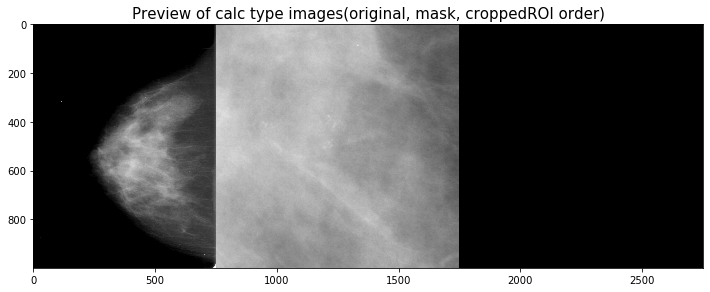

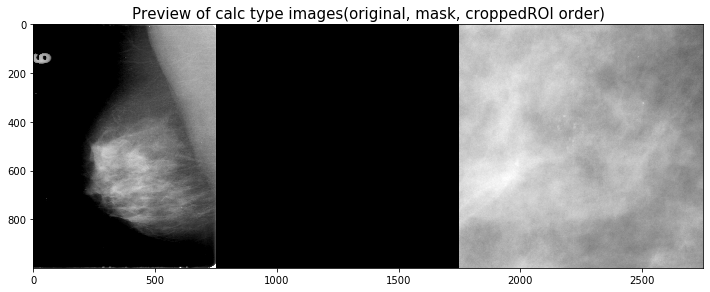

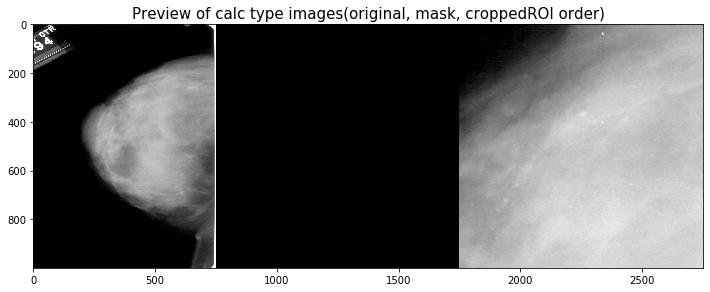

In [12]:
#calc타입 image 확인
for i in range(3):    
    plt.figure(figsize=(12,20))
    original_image_ds = dicom.dcmread(os.path.join(DDSM_dataPATH, calc_case_original_img[i]).replace('\n', '').replace('\r', ''))
    original_image_ds_resized = cv2.resize(original_image_ds.pixel_array, dsize=(750, 1000), interpolation=cv2.INTER_CUBIC)

    croppedROI_image_ds = dicom.dcmread(os.path.join(DDSM_dataPATH, calc_case_croppedROI_img[i]).replace('\n', '').replace('\r', ''))
    croppedROI_image_ds_resized = cv2.resize(croppedROI_image_ds.pixel_array, dsize=(1000, 1000), interpolation=cv2.INTER_CUBIC)

    ROIMask_image_ds = dicom.dcmread(os.path.join(DDSM_dataPATH, calc_case_ROImask_img[i]).replace('\n', '').replace('\r', ''))
    ROIMask_image_ds_resized = cv2.resize(ROIMask_image_ds.pixel_array, dsize=(1000, 1000), interpolation=cv2.INTER_CUBIC)
    #이미지 병합
    merged_image = np.concatenate((np.concatenate((original_image_ds_resized, croppedROI_image_ds_resized), axis=1), ROIMask_image_ds_resized), axis=1)
        
    plt.title('Preview of calc type images(original, mask, croppedROI order)', fontsize=15)
    plt.imshow(merged_image, cmap = 'gray')
    plt.show()

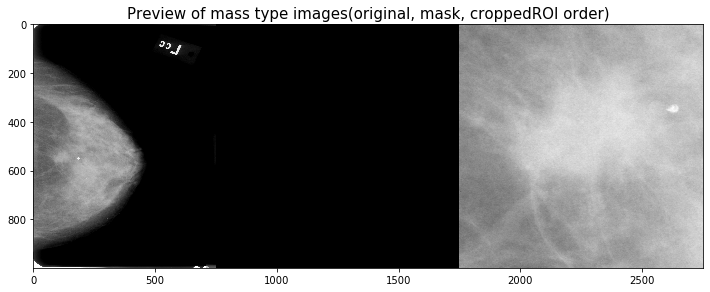

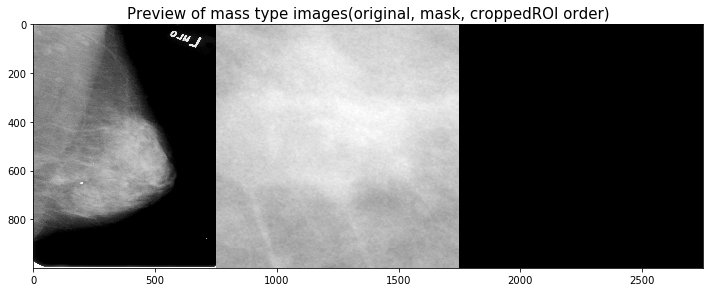

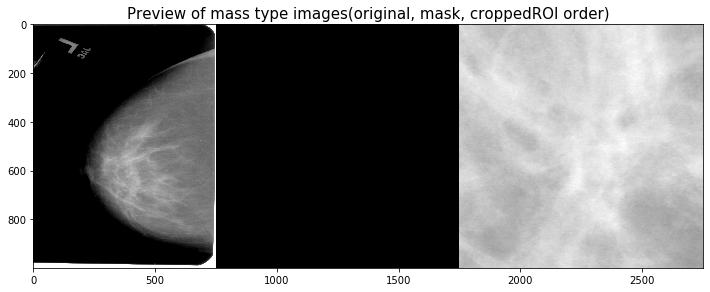

In [11]:
#mass타입 image 확인
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 0.5

# sample image file lists
mass_case_original_img = sample_mass_case_description_train_set_df['image file path'].to_list()
mass_case_croppedROI_img = sample_mass_case_description_train_set_df['cropped image file path'].to_list()
mass_case_ROImask_img = sample_mass_case_description_train_set_df['ROI mask file path'].to_list()

for i in range(3):
    plt.figure(figsize=(12,20))
    original_image_ds = dicom.dcmread(os.path.join(DDSM_dataPATH, mass_case_original_img[i].replace('\n', '').replace('\r', '')))
    original_image_ds_resized = cv2.resize(original_image_ds.pixel_array, dsize=(750, 1000), interpolation=cv2.INTER_CUBIC)

    croppedROI_image_ds = dicom.dcmread(os.path.join(DDSM_dataPATH, mass_case_croppedROI_img[i].replace('\n', '').replace('\r', '')))
    croppedROI_image_ds_resized = cv2.resize(croppedROI_image_ds.pixel_array, dsize=(1000, 1000), interpolation=cv2.INTER_CUBIC)

    ROIMask_image_ds = dicom.dcmread(os.path.join(DDSM_dataPATH, mass_case_ROImask_img[i].replace('\n', '').replace('\r', '')))
    ROIMask_image_ds_resized = cv2.resize(ROIMask_image_ds.pixel_array, dsize=(1000, 1000), interpolation=cv2.INTER_CUBIC)
    merged_image = np.concatenate((np.concatenate((original_image_ds_resized, croppedROI_image_ds_resized), axis=1), ROIMask_image_ds_resized), axis=1)
        
    plt.title('Preview of mass type images(original, mask, croppedROI order)', fontsize=15)
    plt.imshow(merged_image, cmap = 'gray')
    plt.show()

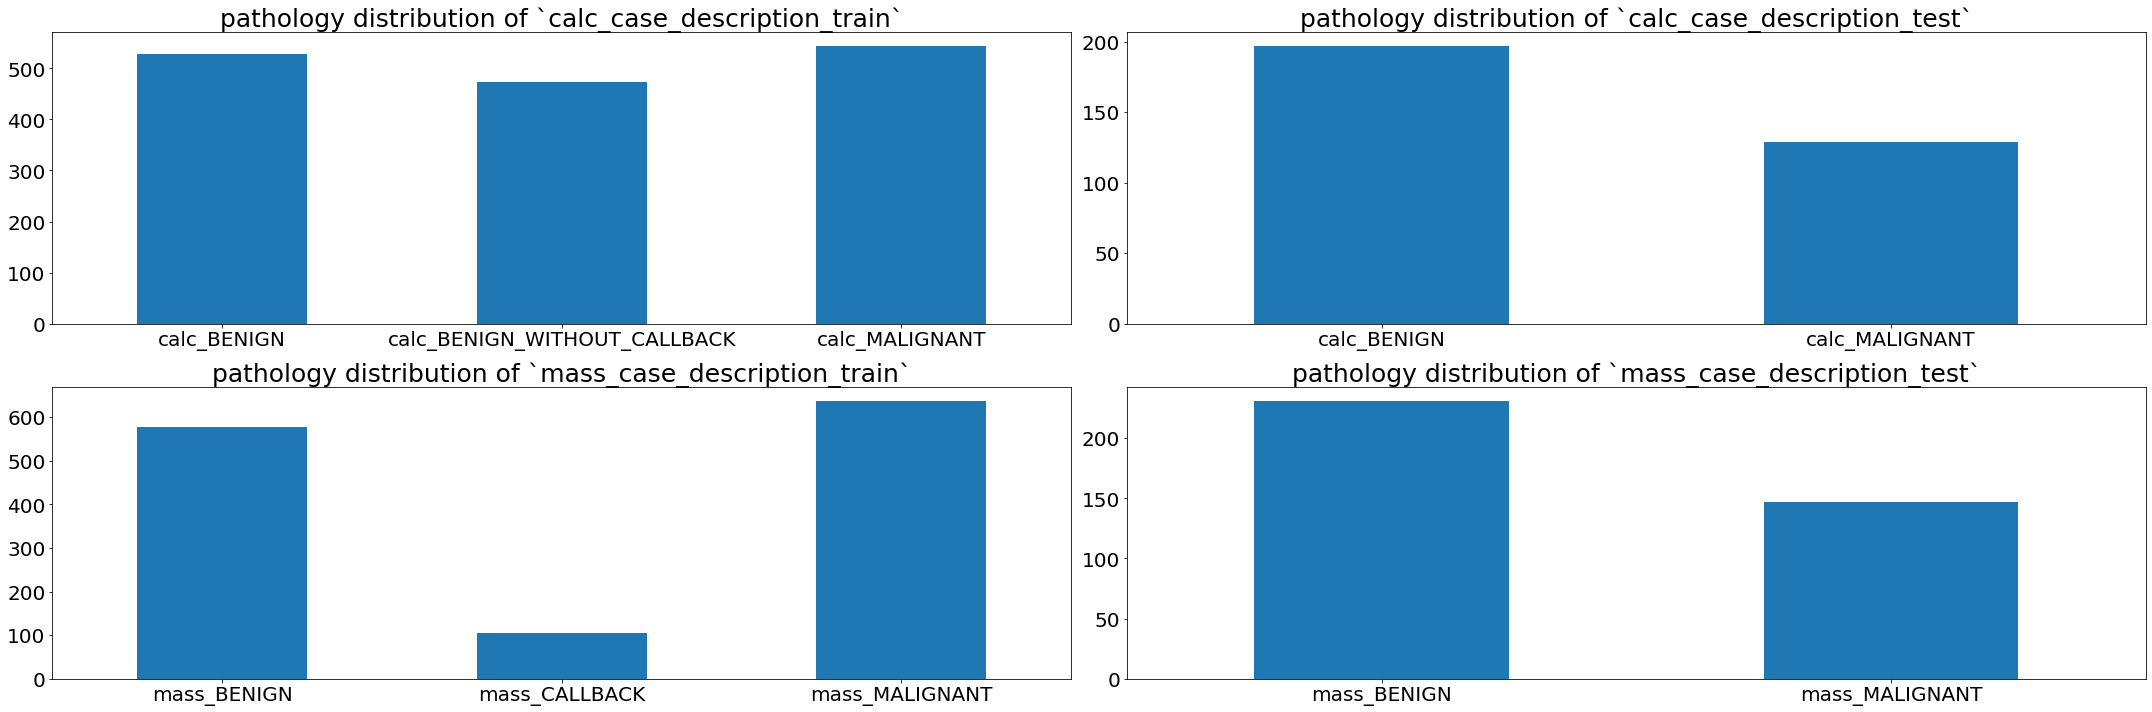

In [3]:
#pathology별 분포 확인
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt

SMALL_SIZE = 17
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',}
matplotlib.rc('font', **font)
params = {'legend.fontsize': SMALL_SIZE,
         'axes.labelsize': MEDIUM_SIZE,
         'axes.titlesize':BIGGER_SIZE,
         'xtick.labelsize':MEDIUM_SIZE,
         'ytick.labelsize':MEDIUM_SIZE}
pylab.rcParams.update(params)

fig, axes = plt.subplots(nrows=2, ncols=2)

calc_case_description_train_set_df['pathology'].value_counts().sort_index().plot(ax=axes[0, 0], kind='bar', rot=0, figsize=(20, 10)).set_title('pathology distribution of `calc_case_description_train`')
calc_case_description_test_set_df['pathology'].value_counts().sort_index().plot(ax=axes[0, 1], kind='bar', rot=0, figsize=(20, 10)).set_title('pathology distribution of `calc_case_description_test`')
mass_case_description_train_set_df['pathology'].value_counts().sort_index().plot(ax=axes[1, 0], kind='bar', rot=0, figsize=(30, 10)).set_title('pathology distribution of `mass_case_description_train`')
mass_case_description_test_set_df['pathology'].value_counts().sort_index().plot(ax=axes[1, 1], kind='bar', rot=0, figsize=(30, 10)).set_title('pathology distribution of `mass_case_description_test`')

plt.tight_layout()
plt.show()